## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [5]:
digits_data = digits["data"]
digits_data.shape

(1797, 64)

In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

#### Check the dataset

In [13]:
import pandas as pd

df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df.rename(columns={64:"target"}, inplace=True)

df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


#### Check the target

In [19]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

#### Plot some numbers

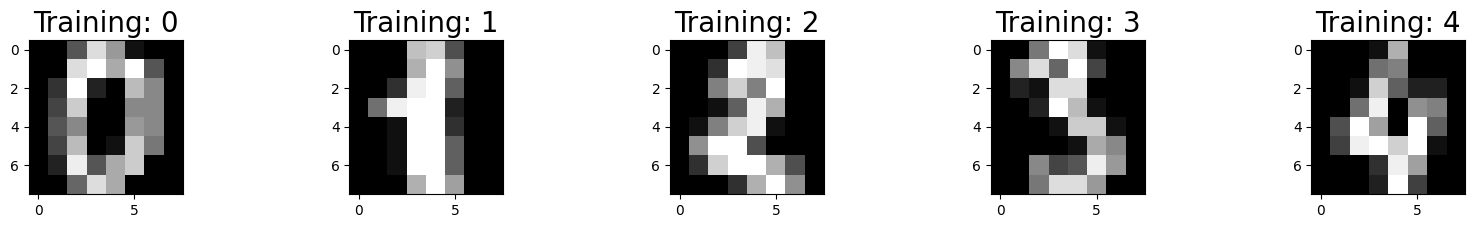

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [24]:
X = digits.data / digits.data.max()
y = digits.target

In [25]:
X.min(), X.max()

(0.0, 1.0)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### To predict

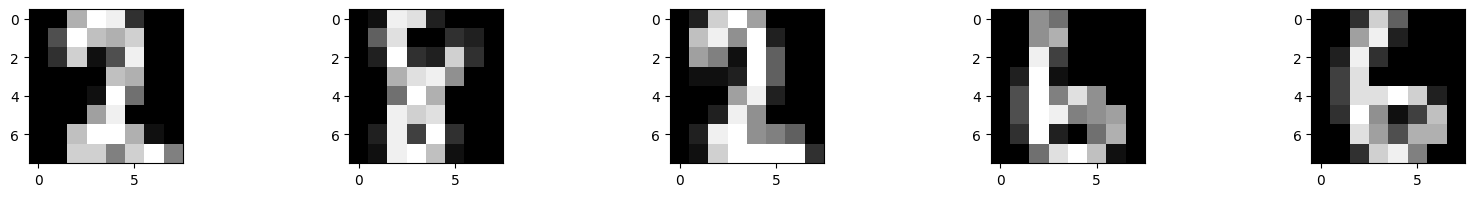

In [27]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray);

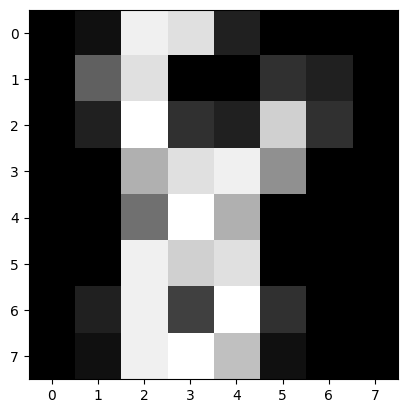

In [28]:
#plt.rcParams['figure.figsize'] = , 2
first_test_image = X_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
X_test[1].ndim

1

In [38]:
X_test[1].reshape(1, -1)

array([[0.    , 0.0625, 0.9375, 0.875 , 0.125 , 0.    , 0.    , 0.    ,
        0.    , 0.375 , 0.875 , 0.    , 0.    , 0.1875, 0.125 , 0.    ,
        0.    , 0.125 , 1.    , 0.1875, 0.125 , 0.8125, 0.1875, 0.    ,
        0.    , 0.    , 0.6875, 0.875 , 0.9375, 0.5625, 0.    , 0.    ,
        0.    , 0.    , 0.4375, 1.    , 0.6875, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.9375, 0.8125, 0.875 , 0.    , 0.    , 0.    ,
        0.    , 0.125 , 0.9375, 0.25  , 1.    , 0.1875, 0.    , 0.    ,
        0.    , 0.0625, 0.9375, 1.    , 0.75  , 0.0625, 0.    , 0.    ]])

In [34]:
# Returns a NumPy Array
# Predict for One Observation (image)

clf.predict(X_test[1].reshape(1, -1))

array([8])

In [41]:
print(clf.predict_proba(X_test[1].reshape(1, -1)))

[[1.38882034e-03 3.21453794e-03 1.91183315e-02 1.62371616e-04
  8.74176605e-02 1.18229805e-02 2.18313809e-03 7.18949934e-04
  8.66590087e-01 7.38312274e-03]]


In [54]:
test_sample = pd.DataFrame(X_test).sample(5)
y_sample = pd.DataFrame(y_test).loc[test_sample.index]

In [62]:
test_sample

array([[0.    , 0.    , 0.4375, 0.875 , 0.125 , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.125 , 1.    , 0.375 , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.125 , 0.9375, 0.5625, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.125 , 1.    , 0.75  , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.125 , 1.    , 1.    , 0.3125, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.1875, 0.8125, 0.8125, 0.    , 0.    ,
        0.    , 0.    , 0.375 , 0.75  , 0.875 , 1.    , 0.75  , 0.3125,
        0.    , 0.    , 0.3125, 1.    , 1.    , 1.    , 1.    , 0.9375],
       [0.    , 0.    , 0.4375, 1.    , 1.    , 0.625 , 0.    , 0.    ,
        0.    , 0.    , 0.875 , 0.8125, 0.4375, 0.25  , 0.    , 0.    ,
        0.    , 0.3125, 1.    , 0.375 , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.875 , 0.9375, 0.5   , 0.375 , 0.0625, 0.    , 0.    ,
        0.    , 0.25  , 0.75  , 0.75  , 1.    , 0.8125, 0.125 , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.0625, 0.9375, 0.375 ,

In [70]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

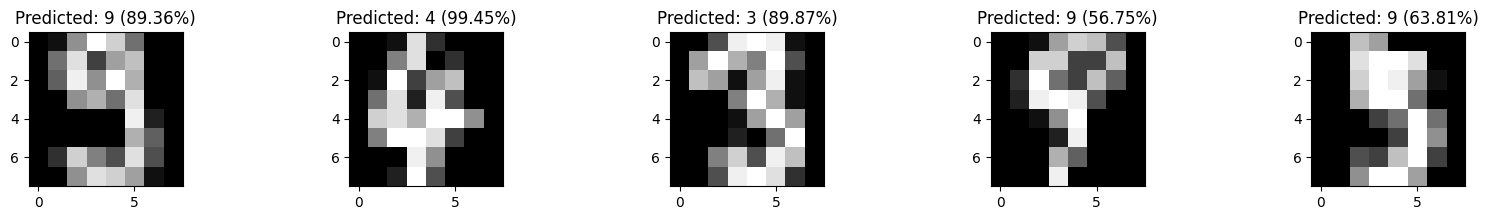

In [97]:
plt.figure(figsize=(20,2))

test_sample = pd.DataFrame(X_test).sample(5)
y_sample = pd.DataFrame(y_test).loc[test_sample.index].values
preds = clf.predict(test_sample)
probs = clf.predict_proba(test_sample).max(axis=1)
test_sample = test_sample.values

for i, (img, pred, prob) in enumerate(zip(test_sample, preds, probs)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Predicted: {pred} ({prob:.2%})");

In [89]:
clf.predict(test_sample)

array([7, 8, 2, 8, 8])

In [90]:
clf.predict_proba(test_sample).max(axis=1)

array([0.94296013, 0.89773668, 0.97484824, 0.86057132, 0.69719304])

### Probabilities

In [42]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 4,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 9, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [ ]:
y_test[0:1]

### Measuring Model Performance (Digits Dataset)

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

<AxesSubplot: >

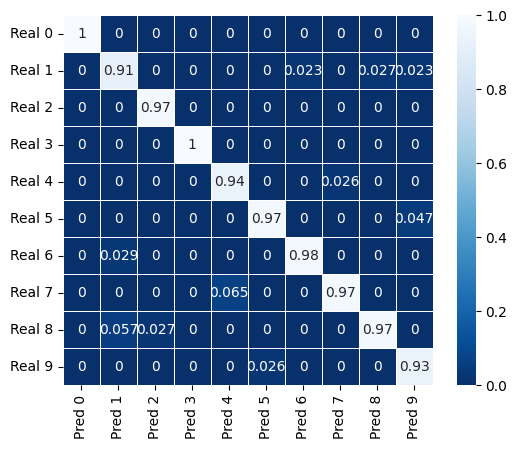

In [110]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=[f"Real {i}" for i in clf.classes_],
                  columns=[f"Pred {i}" for i in clf.classes_])

import seaborn as sns
sns.heatmap(cm / cm.sum(), annot=True, linewidths=.5, square = True, cmap = 'Blues_r')

In [108]:
pd.DataFrame(digits.target).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [102]:
cm.sum()

Pred 0    27
Pred 1    35
Pred 2    37
Pred 3    29
Pred 4    31
Pred 5    39
Pred 6    44
Pred 7    38
Pred 8    37
Pred 9    43
dtype: int64

NameError: name 'score' is not defined

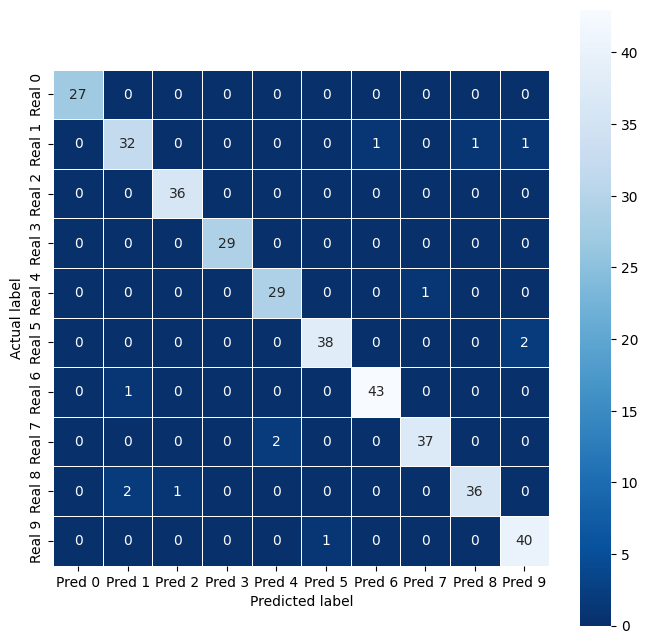

In [109]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [115]:
y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [118]:
from sklearn.metrics import roc_auc_score, roc_curve

print(roc_auc_score(y_test, y_prob, average="weighted", multi_class="ovr"))

0.9988422378357344


In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.91      0.91        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.94      0.97      0.95        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.97      0.92      0.95        39
           9       0.93      0.98      0.95        41

    accuracy                           0.96       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.96      0.96      0.96       360



In [ ]:
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(8,8))
sns.heatmap(norm_conf_mx, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### YellowBrick library

In [1]:
# pip install yellowbrick
# https://www.scikit-yb.org/en/latest/

In [ ]:
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

classes = digits['target_names']
vizualizer = ConfusionMatrix(logisticRegr, classes=classes, support=True)
vizualizer.fit(x_train, y_train)
vizualizer.score(x_test, y_test)
vizualizer.show();